In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Task02：预备知识
1. 数据操作
1. 数据预处理
1. 线性代数
1. 矩阵计算
1. 自动求导

In [2]:
import torch

x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

### 2.1 torch 里基本的数据操作

In [3]:
print(x.shape)
print(x.numel())

torch.Size([12])
12


In [4]:
# reshape to 3 rows, 4 columns
X = x.reshape(3,4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [5]:
# 2 matrix, 3 rows, 4 columns
print(torch.zeros(2,3,4))
print(torch.ones(2,3,4))
print(torch.randn(2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])
tensor([[[-0.2345, -0.4523, -0.5606,  0.5424],
         [-0.7248,  0.7669, -1.0033,  0.7119],
         [-0.3340,  0.5911, -0.7190,  0.0969]],

        [[ 0.5872,  1.0301, -0.1003,  0.4931],
         [-2.0013, -0.0479,  0.1491,  0.9000],
         [ 0.4095,  1.9494, -0.6953, -1.8976]]])


In [6]:
torch.tensor([[1,2,3,4],[2,3,1,4],[4,3,2,1]])

tensor([[1, 2, 3, 4],
        [2, 3, 1, 4],
        [4, 3, 2, 1]])

In [7]:
x = torch.tensor([1.0,2,4,8])
y = torch.tensor([2,2,2,2])
x + y, x - y, x*y, x /y, x**y, torch.exp(x)

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]),
 tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03]))

In [8]:
X = torch.arange(12).reshape(3,4)
Y = torch.tensor([[1,2,3,4],[2,3,1,4],[4,3,2,1]])

# dim = 0 represent horizontal, dim = 1 means vertical
torch.cat((X,Y), dim = 0), torch.cat((X,Y), dim = 1)

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [ 1,  2,  3,  4],
         [ 2,  3,  1,  4],
         [ 4,  3,  2,  1]]),
 tensor([[ 0,  1,  2,  3,  1,  2,  3,  4],
         [ 4,  5,  6,  7,  2,  3,  1,  4],
         [ 8,  9, 10, 11,  4,  3,  2,  1]]))

In [9]:
print(X == Y)
print(X.sum())

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])
tensor(66)


In [10]:
a = torch.arange(3).reshape(3,1)
b = torch.arange(2).reshape(1,2)
a, b ,a + b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]),
 tensor([[0, 1],
         [1, 2],
         [2, 3]]))

In [11]:
X[-1], X[1:3]

(tensor([ 8,  9, 10, 11]),
 tensor([[ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]))

In [12]:
print(X)
X[1,2] = 9
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


tensor([[ 0,  1,  2,  3],
        [ 4,  5,  9,  7],
        [ 8,  9, 10, 11]])

In [13]:
print(X)
X[:1,:] = 13
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  9,  7],
        [ 8,  9, 10, 11]])


tensor([[13, 13, 13, 13],
        [ 4,  5,  9,  7],
        [ 8,  9, 10, 11]])

In [14]:
before = id(Y)
Y = X+Y
id(Y) == before

False

In [15]:
Z = torch.zeros_like(Y)
print('before', id(Z))
Z[:] = X+Y
print('after', id(Z))

before 136387781999024
after 136387781999024


In [16]:
# 原地址上修改
before = id(X)
X += Y
id(X) == before

True

In [17]:
# numpy converter
A = X.numpy()
B = torch.Tensor(A)
print(type(A), type(B))

<class 'numpy.ndarray'> <class 'torch.Tensor'>


In [18]:
# convert to python scaler
a = torch.tensor([3.5])
a, a.item(), float(a) , int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

### 2.2 数据预处理

In [19]:
os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')
    f.write('NA,Pave,127500\n')
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [20]:
data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [21]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
inputs

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,NumRooms,Alley
0,3.0,Pave
1,2.0,NaN
2,4.0,NaN
3,3.0,NaN


In [22]:
inputs = pd.get_dummies(inputs, dummy_na = True)
inputs

,NumRooms,Alley_Pave,Alley_nan
0,3.0,1,0
1,2.0,0,1
2,4.0,0,1
3,3.0,0,1


In [23]:
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X,y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

### 2.3 线性代数

In [24]:
# scalers only contain one elements

x = torch.tensor([3.0])
y = torch.tensor([5.0])
x+y, x-y, x*y, x/y, x**y

(tensor([8.]), tensor([-2.]), tensor([15.]), tensor([0.6000]), tensor([243.]))

In [25]:
x = torch.arange(4)
x, x[3], len(x), x.shape, x.size()

(tensor([0, 1, 2, 3]), tensor(3), 4, torch.Size([4]), torch.Size([4]))

In [26]:
A = torch.arange(20).reshape(5,4)
A, A.T

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15],
         [16, 17, 18, 19]]),
 tensor([[ 0,  4,  8, 12, 16],
         [ 1,  5,  9, 13, 17],
         [ 2,  6, 10, 14, 18],
         [ 3,  7, 11, 15, 19]]))

In [27]:
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B, B == B.T

(tensor([[1, 2, 3],
         [2, 0, 4],
         [3, 4, 5]]),
 tensor([[True, True, True],
         [True, True, True],
         [True, True, True]]))

In [28]:
X = torch.arange(24).reshape(2,3,4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [29]:
A = torch.arange(20,dtype = torch.float32).reshape(4,5)
B = A.clone()
A, A+B, A*B, (A*B).shape

(tensor([[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.,  9.],
         [10., 11., 12., 13., 14.],
         [15., 16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.,  8.],
         [10., 12., 14., 16., 18.],
         [20., 22., 24., 26., 28.],
         [30., 32., 34., 36., 38.]]),
 tensor([[  0.,   1.,   4.,   9.,  16.],
         [ 25.,  36.,  49.,  64.,  81.],
         [100., 121., 144., 169., 196.],
         [225., 256., 289., 324., 361.]]),
 torch.Size([4, 5]))

In [30]:
x = torch.arange(5, dtype = torch.float32)
x, x.sum(), A.shape, A.sum()

(tensor([0., 1., 2., 3., 4.]), tensor(10.), torch.Size([4, 5]), tensor(190.))

In [31]:
A.sum(axis = 0), A.sum(axis = 1), A.sum(axis= [0,1])

(tensor([30., 34., 38., 42., 46.]), tensor([10., 35., 60., 85.]), tensor(190.))

In [32]:
A.mean(), A.sum()/A.numel()

(tensor(9.5000), tensor(9.5000))

In [33]:
A.mean(axis = 0), A.sum(axis=0)/A.shape[0]

(tensor([ 7.5000,  8.5000,  9.5000, 10.5000, 11.5000]),
 tensor([ 7.5000,  8.5000,  9.5000, 10.5000, 11.5000]))

In [34]:
A.sum(axis = 1),A.sum(axis = 1, keepdims = True)

(tensor([10., 35., 60., 85.]),
 tensor([[10.],
         [35.],
         [60.],
         [85.]]))

In [35]:
A / sum(A)

tensor([[0.0000, 0.0294, 0.0526, 0.0714, 0.0870],
        [0.1667, 0.1765, 0.1842, 0.1905, 0.1957],
        [0.3333, 0.3235, 0.3158, 0.3095, 0.3043],
        [0.5000, 0.4706, 0.4474, 0.4286, 0.4130]])

In [36]:
A, A.cumsum(axis = 0)

(tensor([[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.,  9.],
         [10., 11., 12., 13., 14.],
         [15., 16., 17., 18., 19.]]),
 tensor([[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  7.,  9., 11., 13.],
         [15., 18., 21., 24., 27.],
         [30., 34., 38., 42., 46.]]))

In [37]:
y = torch.ones(5,dtype = torch.float32)
x,y, torch.dot(x,y),torch.sum(x*y)

(tensor([0., 1., 2., 3., 4.]),
 tensor([1., 1., 1., 1., 1.]),
 tensor(10.),
 tensor(10.))

In [38]:
A.shape, x.shape,torch.mv(A,x)

(torch.Size([4, 5]), torch.Size([5]), tensor([ 30.,  80., 130., 180.]))

In [39]:
B = torch.ones(5,3)
A,B,torch.mm(A,B)

(tensor([[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.,  9.],
         [10., 11., 12., 13., 14.],
         [15., 16., 17., 18., 19.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[10., 10., 10.],
         [35., 35., 35.],
         [60., 60., 60.],
         [85., 85., 85.]]))

In [40]:
# L2 norm
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [41]:
# L1 norm
torch.abs(u).sum()

tensor(7.)

In [42]:
torch.norm(torch.ones(4,9))

tensor(6.)

### 2.4 矩阵计算

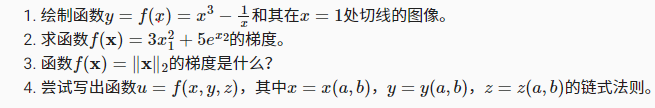

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


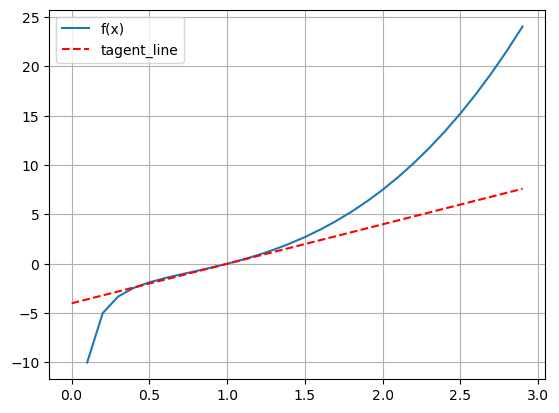

In [43]:
import matplotlib.pyplot as plt

def f(x):
    return x ** 3 - 1/x
def tagent(f, x, x1):
    h = 1e-4
    grad = (f(x1+h) - f(x1))/h
    return grad*(x-x1)+f(x1)

x = np.arange(0,3,0.1)
y = f(x)
y_t = tagent(f,x,1)
plt.plot(x,y,label = 'f(x)')
plt.plot(x,y_t,'r--',label='tagent_line')
plt.grid()
plt.legend()
plt.show()

### 2.4.2
$\frac{dx_1}{dy} = 6x_1$    |     $\frac{dx_2}{dy} = 5e^{x_2}$

grad = $[ 6x_1, 5e^{x_2}]$

### 2.4.3
$f(x) = ||x||_2$

$grad = \frac{x}{||x||_2}$

### 2.4.4
尝试写出函数u = f ( x , y , z ) u = f(x, y, z)u=f(x,y,z)，其中x = x ( a , b ) x = x(a, b)x=x(a,b)，y = y ( a , b ) y = y(a, b)y=y(a,b)，z = z ( a , b ) z = z(a, b)z=z(a,b)的链式法则。

$\frac{du}{da} = \frac{du}{dx}\frac{dx}{da}+\frac{du}{dy}\frac{dy}{da}+\frac{du}{dz}\frac{dz}{da}$

$\frac{du}{db} = \frac{du}{dx}\frac{dx}{db}+\frac{du}{dy}\frac{dy}{db}+\frac{du}{dz}\frac{dz}{db}$

### 2.5自动求导

In [44]:
x = torch.arange(4.0)
x.requires_grad_(True)
x, x.grad

(tensor([0., 1., 2., 3.], requires_grad=True), None)

In [45]:
y = torch.dot(x,x)*2
y

tensor(28., grad_fn=<MulBackward0>)

In [46]:
y.backward(), x.grad

(None, tensor([ 0.,  4.,  8., 12.]))

In [47]:
x.grad == 4*x

tensor([True, True, True, True])

In [48]:
x.grad.zero_()
y = x.sum()
y.backward(), x.grad

(None, tensor([1., 1., 1., 1.]))

In [49]:
x.grad.zero_()
y = x*x
y.sum().backward(), x.grad

(None, tensor([0., 2., 4., 6.]))

In [50]:
x.grad.zero_()
y = x*x
u = y.detach()
z = u*x
z.sum().backward(), x.grad == u

(None, tensor([True, True, True, True]))

In [51]:
x.grad.zero_()
y.sum().backward()
x.grad == 2*x

tensor([True, True, True, True])

In [52]:
def f(a):
    b = a * 2
    
    while b.norm() < 1000:
        b = b*2
    if b.sum() > 0:
        c = b
    else:
        c = 100*b
    return c

a = torch.randn(size = (3,), requires_grad = True)
d = f(a)
d.backward(torch.ones_like(d)), a.grad == d/a    

(None, tensor([True, True, True]))

## Task03：线性神经网络

In [53]:
%matplotlib inline
import math
import time

!pip install d2l
from d2l import torch as d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 48.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 76.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 75.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully uninstalled idna-3.4
  Attempting uninstall: requests
    Found existing installation: requests 2.28.2
    Uninstalling requests-2.28.2:
 

In [54]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [55]:
class Timer:  
    """记录多次运行时间。"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器。"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中。"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间。"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和。"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间。"""
        return np.array(self.times).cumsum().tolist()

In [56]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.07204 sec'

In [57]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00136 sec'

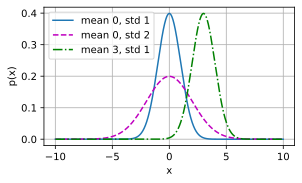

In [58]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

x = np.arange(-10, 10, 0.01)

params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

### 3.2 线性回归的从零开始实现
$y = Wx+b+ϵ$

In [59]:
def synthetic_data(w, b, num_examples):  
    """生成 y = Xw + b + 噪声。"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
true_w, true_b,features,labels

(tensor([ 2.0000, -3.4000]),
 4.2,
 tensor([[ 0.8643, -1.1893],
         [ 1.2713,  0.2969],
         [-1.5219, -0.1592],
         ...,
         [-0.5495, -1.1987],
         [ 0.2258, -0.1633],
         [-0.2692, -0.6553]]),
 tensor([[  9.9722],
         [  5.7284],
         [  1.7043],
         [  6.6174],
         [ -1.5656],
         [  6.7632],
         [ -3.3643],
         [  5.3316],
         [  0.2146],
         [  0.4364],
         [  1.6569],
         [  1.1867],
         [  0.9362],
         [  9.4087],
         [  3.0670],
         [ 10.9876],
         [  2.0365],
         [ -2.1718],
         [  5.3899],
         [  4.2365],
         [ -0.8844],
         [  8.9425],
         [  4.2371],
         [  0.1319],
         [ -4.0815],
         [  1.4528],
         [ 10.3192],
         [ -2.9033],
         [  5.8846],
         [  1.3421],
         [ -0.6271],
         [  4.4518],
         [  7.5690],
         [  2.6469],
         [  0.5749],
         [ -0.6461],
         [ -0.5114]

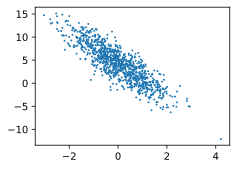

In [60]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(),
                labels.detach().numpy(), 1)

In [61]:
import random
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i +
                                                   batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.6283,  1.4686],
        [-1.1298, -0.5550],
        [-0.6355,  0.7599],
        [ 0.6104,  0.3751],
        [ 0.7023,  0.5076],
        [-1.6820, -1.3224],
        [-0.9336, -0.1761],
        [-0.0398, -1.3270],
        [-0.0947, -0.6968],
        [-0.2480,  0.0109]]) 
 tensor([[-2.0500],
        [ 3.8209],
        [ 0.3499],
        [ 4.1542],
        [ 3.8904],
        [ 5.3316],
        [ 2.9359],
        [ 8.6301],
        [ 6.3820],
        [ 3.6580]])


In [62]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

def linreg(X, w, b):  
    """线性回归模型。"""
    return torch.matmul(X, w) + b

def squared_loss(y_hat, y):  
    """均方损失。"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

def sgd(params, lr, batch_size):  
    """小批量随机梯度下降。"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.037332
epoch 2, loss 0.000131
epoch 3, loss 0.000051


In [63]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-0.0003, -0.0005], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0018], grad_fn=<RsubBackward1>)


### 3.3 线性回归的简洁实现
with pytorch

In [64]:
from torch.utils import data

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b,1000)

In [65]:
# 构造数据迭代器
def load_array(data_arrays, batch_size, is_train = True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle = is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

next(iter(data_iter))

[tensor([[ 1.0010, -0.9586],
         [ 0.3504, -1.1657],
         [ 1.5442, -2.8967],
         [-0.5035, -0.2842],
         [ 0.1425,  0.5399],
         [-0.1361,  0.0369],
         [-1.6701, -0.5649],
         [-0.4182,  1.4406],
         [ 1.7334, -0.1120],
         [ 0.8972,  0.3264]]),
 tensor([[ 9.4700],
         [ 8.8638],
         [17.1351],
         [ 4.1590],
         [ 2.6548],
         [ 3.8165],
         [ 2.7798],
         [-1.5098],
         [ 8.0416],
         [ 4.8917]])]

In [66]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))

net[0].weight.data.normal_(0,0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [67]:
# 计算均方误差使用的是MSELoss类，也称为平方 L2 范数
loss = nn.MSELoss()

# SGD - Stochastic Gradient Descend
trainer = torch.optim.SGD(net.parameters(), lr = 0.005)

In [68]:
# 训练
epochs = 5

for epoch in range(epochs):
    for X,y in data_iter:
        l = loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 4.239599
epoch 2, loss 0.523198
epoch 3, loss 0.064968
epoch 4, loss 0.008194
epoch 5, loss 0.001122


In [69]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([ 0.0127, -0.0135])
b的估计误差： tensor([0.0258])


### 3.5图像分类数据集

In [70]:
import torchvision
from torchvision import transforms

d2l.use_svg_display()

In [71]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root="../data", train=True,
                                                transform=trans,
                                                download=True)
mnist_test = torchvision.datasets.FashionMNIST(root="../data", train=False,
                                               transform=trans, download=True)

len(mnist_train), len(mnist_test)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



(60000, 10000)

In [72]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [73]:
def get_fashion_mnist_labels(labels):  
    """返回Fashion-MNIST数据集的文本标签。"""
    text_labels = [
        't-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt',
        'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            ax.imshow(img.numpy())
        else:
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

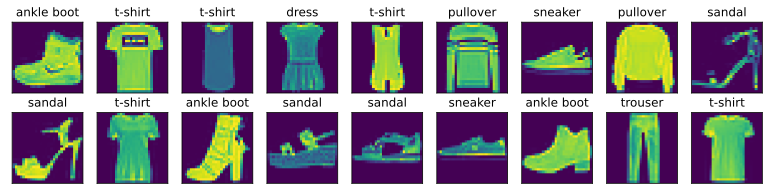

In [74]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));

In [75]:
batch_size = 256

def get_dataloader_workers():  
    """使用4个进程来读取数据。"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())

timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'2.96 sec'

In [76]:
def load_data_fashion_mnist(batch_size, resize=None):  
    """下载Fashion-MNIST数据集，然后将其加载到内存中。"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root="../data",
                                                    train=True,
                                                    transform=trans,
                                                    download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root="../data",
                                                   train=False,
                                                   transform=trans,
                                                   download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


### 3.6 softmax回归的从零开始实现

In [77]:
from IPython import display
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

# 将展平每个图像，把它们看作长度为784的向量。 因为我们的数据集有10个类别，所以网络输出维度为 10
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

In [78]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdim=True), X.sum(1, keepdim=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

$softmax(X)_{ij}=\frac{exp(X_{ij})}{∑_kexp(X_{ik})}$

In [79]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition

In [80]:
# 我们将每个元素变成一个非负数。此外，依据概率原理，每行总和为1
X = torch.normal(0,1,(2,5))
X_prob = softmax(X)
X, X_prob, X_prob.sum(1, keepdim=True)

(tensor([[ 0.4124,  0.4921,  1.0585, -0.2850, -0.5259],
         [-0.4038, -0.6683, -1.0140, -1.6166,  2.2975]]),
 tensor([[0.2049, 0.2219, 0.3910, 0.1020, 0.0802],
         [0.0571, 0.0438, 0.0310, 0.0170, 0.8510]]),
 tensor([[1.0000],
         [1.0000]]))

In [81]:
# 实现softmax回归
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])),W) + b)

In [82]:
# 创建一个数据y_hat，其中包含2个样本在3个类别的预测概率， 使用y作为y_hat中概率的索引
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [83]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[range(len(y_hat)),y])
cross_entropy(y_hat,y)

tensor([2.3026, 0.6931])

In [84]:
def accuracy(y_hat, y):  
    """计算预测正确的数量。"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

accuracy(y_hat, y) / len(y)

0.5

In [85]:
def evaluate_accuracy(net, data_iter):  
    """计算在指定数据集上模型的精度。"""
    if isinstance(net, torch.nn.Module):
        net.eval()
    metric = Accumulator(2)
    for X, y in data_iter:
        metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

class Accumulator:  
    """在`n`个变量上累加。"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

print(evaluate_accuracy(net, test_iter))

def train_epoch_ch3(net, train_iter, loss, updater):  
    """训练模型一个迭代周期（定义见第3章）。"""
    if isinstance(net, torch.nn.Module):
        net.train()
    metric = Accumulator(3)
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.backward()
            updater.step()
            metric.add(
                float(l) * len(y), accuracy(y_hat, y),
                y.size().numel())
        else:
            l.sum().backward()
            updater(X.shape[0])
            metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    return metric[0] / metric[2], metric[1] / metric[2]

0.0604


In [86]:
def train_epoch_ch3(net, train_iter, loss, updater):  
    """训练模型一个迭代周期（定义见第3章）。"""
    if isinstance(net, torch.nn.Module):
        net.train()
    metric = Accumulator(3)
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.backward()
            updater.step()
            metric.add(
                float(l) * len(y), accuracy(y_hat, y),
                y.size().numel())
        else:
            l.sum().backward()
            updater(X.shape[0])
            metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    return metric[0] / metric[2], metric[1] / metric[2]

In [87]:
class Animator:  
    """在动画中绘制数据。"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes,]
        self.config_axes = lambda: d2l.set_axes(self.axes[
            0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [88]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  
    """训练模型（定义见第3章）。"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

CPU times: user 39.2 s, sys: 6.31 s, total: 45.6 s
Wall time: 46.4 s


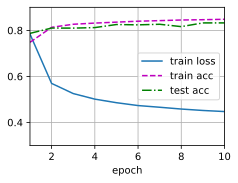

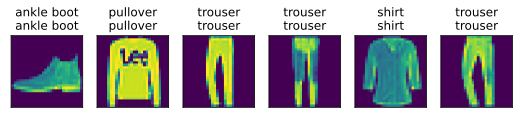

In [89]:
%%time
lr = 0.1

def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

def predict_ch3(net, test_iter, n=6):  
    """预测标签（定义见第3章）。"""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)

### 3.7 Softmax回归的简洁实现代码

CPU times: user 36.9 s, sys: 6.18 s, total: 43.1 s
Wall time: 45.1 s


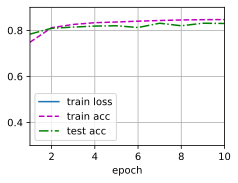

In [90]:
%%time
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

loss = nn.CrossEntropyLoss()

trainer = torch.optim.SGD(net.parameters(), lr=0.1)

num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## Task04：多层感知机

### 4.1多层感知机代码

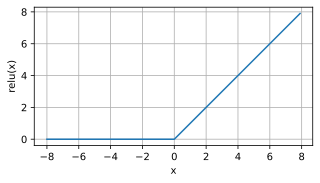

In [91]:
# ReLU提供了一种非常简单的非线性变换 - Recitified linear unit

x = torch.arange(-8,8,0.1, requires_grad = True)
y = torch.relu(x)
d2l.plot(x.detach(),y.detach(), 'x','relu(x)', figsize=(5,2.5))

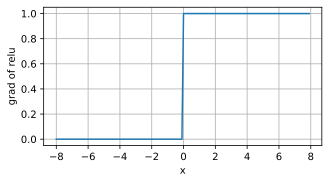

In [92]:
y.backward(torch.ones_like(x), retain_graph = True)
d2l.plot(x.detach(),x.grad,'x','grad of relu', figsize = (5,2.5))

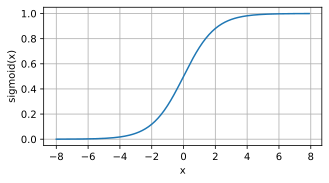

In [93]:
# 对于一个定义域在R中的输入，sigmoid函数将输入变换为区间(0, 1)上的输出
y = torch.sigmoid(x)
d2l.plot(x.detach(),y.detach(),'x','sigmoid(x)', figsize=(5,2.5))

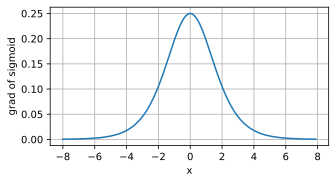

In [94]:
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph = True)
d2l.plot(x.detach(),x.grad,'x','grad of sigmoid', figsize=(5,2.5))

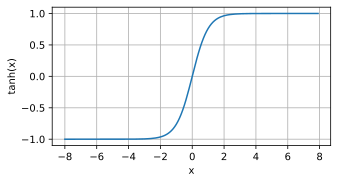

In [95]:
y = torch.tanh(x)
d2l.plot(x.detach(),y.detach(),'x','tanh(x)',figsize = (5,2.5))

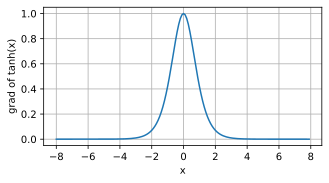

In [96]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph = True)
d2l.plot(x.detach(),x.grad, 'x', 'grad of tanh(x)',figsize = (5,2.5))

### 4.2 多层感知机的从零开始实现代码

In [97]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

#### 实现一个具有单隐藏层的多层感知机，它包含256个隐藏单元

In [98]:
num_inputs, num_outputs, num_hiddens = 784, 10 ,256

W1 = nn.Parameter(\
    torch.randn(num_inputs, num_hiddens, requires_grad = True) * 0.01)
b1 = nn.Parameter(\
    torch.zeros(num_hiddens, requires_grad = True))
W2 = nn.Parameter(\
    torch.randn(num_hiddens,num_outputs, requires_grad = True) * 0.01)
b2 = nn.Parameter(\
    torch.zeros(num_outputs, requires_grad = True))

params = [W1,b1,W2,b2]

#### 实现ReLU激活函数和模型

In [99]:
def relu(x):
    a = torch.zeros_like(x)
    return torch.max(x,a)

def net(X):
    X = X.reshape((-1,num_inputs))
    H = relu(X @ W1 + b1)
    return (H @ W2 +b2)

loss = nn.CrossEntropyLoss()

#### 多层感知机的训练过程与softmax回归的训练过程完全相同

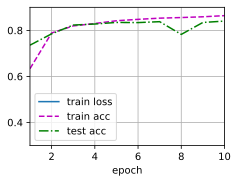

In [100]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr = lr)
d2l.train_ch3(net, train_iter, test_iter,loss, num_epochs, updater)

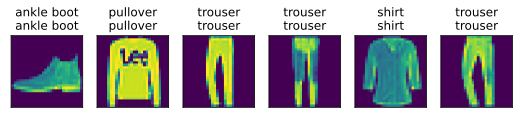

In [101]:
d2l.predict_ch3(net,test_iter)

### 4.3多层感知机的简洁实现

#### 隐藏层 包含256个隐藏单元，并使用了ReLU激活函数

In [102]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784,256), nn.ReLU(), nn.Linear(256,10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

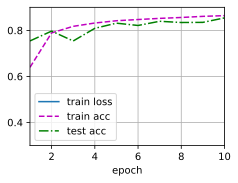

In [103]:
batch_size, lr, num_epochs = 256, 0.1, 10

loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter,test_iter,loss, num_epochs, trainer)

### 4.4模型选择、欠拟合和过拟合
通过多项式拟合来交互地探索这些概念

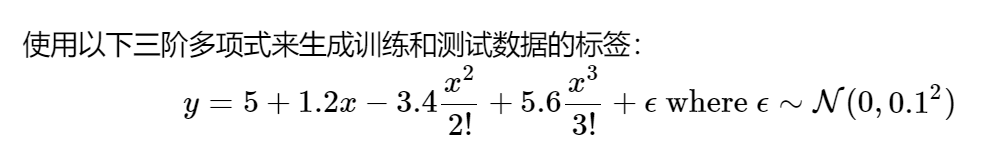

In [104]:
max_degree = 20
n_train, n_test = 100,100

true_w = np.zeros(max_degree)
true_w[:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size = (n_train+n_test,1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1,-1))
for i in range(max_degree):
    poly_features[:,i] /= math.gamma(i+1)

labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale = 0.1, size = labels.shape)


# peek the top 2 samples

true_w, features, poly_features, labels = [torch.tensor(x, dtype=torch.float32) for x in [true_w, features, poly_features, labels]]
features[:2], poly_features[:2], labels[:2]

(tensor([[-0.2179],
         [ 2.5873]]),
 tensor([[ 1.0000e+00, -2.1786e-01,  2.3730e-02, -1.7233e-03,  9.3855e-05,
          -4.0894e-06,  1.4848e-07, -4.6211e-09,  1.2584e-10, -3.0461e-12,
           6.6361e-14, -1.3143e-15,  2.3860e-17, -3.9985e-19,  6.2221e-21,
          -9.0368e-23,  1.2304e-24, -1.5768e-26,  1.9084e-28, -2.1882e-30],
         [ 1.0000e+00,  2.5873e+00,  3.3471e+00,  2.8867e+00,  1.8672e+00,
           9.6621e-01,  4.1665e-01,  1.5400e-01,  4.9806e-02,  1.4318e-02,
           3.7046e-03,  8.7137e-04,  1.8788e-04,  3.7392e-05,  6.9104e-06,
           1.1920e-06,  1.9275e-07,  2.9336e-08,  4.2167e-09,  5.7421e-10]]),
 tensor([ 4.7162, 12.7903]))

In [105]:
def evaluate_loss(net, data_iter, loss):
    """评估给定数据集上模型的损失"""
    metric = d2l.Accumulator(2)
    for X,y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out,y)
        metric.add(l.sum(), l.numel())
    return metric[0]/metric[1]

定义训练函数

In [109]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss()
    input_shape = train_features.shape[-1]
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1, 1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1, 1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(
                net, train_iter, loss), evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

三阶多项式函数拟合(正态)

weight: [[ 4.9930067  1.1950539 -3.3966234  5.6150255]]


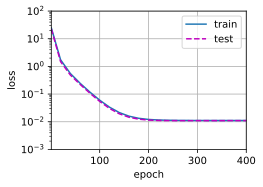

In [110]:
train(poly_features[:n_train, :4], poly_features[n_train:, :4], labels[:n_train], labels[n_train:])

线性函数拟合(欠拟合)

weight: [[3.2483535 3.7021964]]


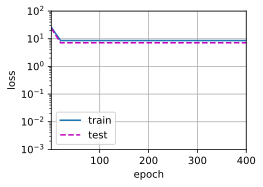

In [111]:
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

高阶多项式函数拟合(过拟合)

weight: [[ 4.974662    1.2879913  -3.3316689   5.118312   -0.09788433  1.3339443
  -0.05375241  0.10747174 -0.19174564  0.01027477 -0.12194952 -0.15443812
   0.2118281  -0.09530183 -0.08040532 -0.09175401 -0.06974281  0.04867053
  -0.01580368  0.17543206]]


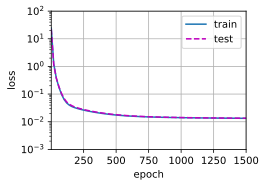

In [112]:
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

### 4.3权重衰减代码

#### 权重衰减
权重衰减是最广泛使用的正则化的技术之一

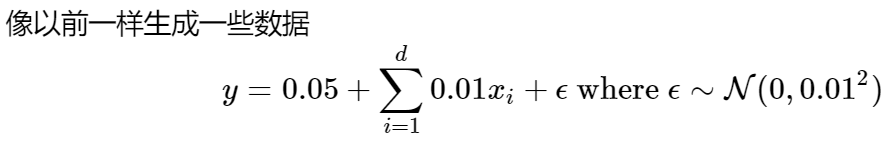

In [113]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train = False)

In [114]:
def init_params():
    w = torch.normal(0, 1, size = (num_inputs, 1), requires_grad = True)
    b = torch.zeros(1, requires_grad = True)
    return [w, b]

def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

In [115]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.01
    animator = d2l.Animator(xlabel = "epochs", ylabel = 'loss', yscale = 'log', xlim=[5, num_epochs], legend = ['train', 'test'])
    
    for epoch in range(num_epochs):
        for X,y in train_iter:
            with torch.enable_grad():
                l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

忽略正则化直接训练

w的L2范数是： 13.546618461608887


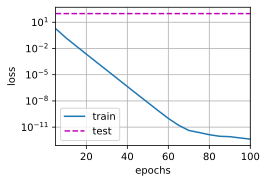

In [116]:
train(lambd=0)

使用权重衰减

w的L2范数是： 0.030681053176522255


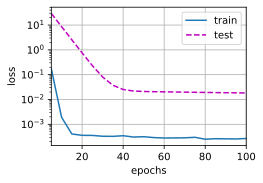

In [117]:
train(lambd=3)

简洁实现

In [118]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss()
    num_epochs, lr = 100, 0.003
    trainer = torch.optim.SGD([{
        "params": net[0].weight,
        'weight_decay': wd}, {
            "params": net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with torch.enable_grad():
                trainer.zero_grad()
                l = loss(net(X), y)
            l.backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

w的L2范数： 15.292153358459473


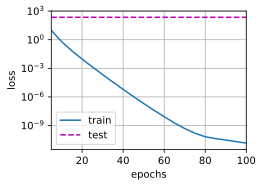

In [119]:
train_concise(0)

w的L2范数： 0.3767879903316498


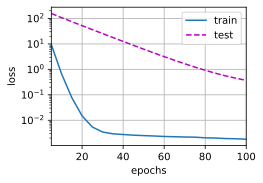

In [120]:
train_concise(3)

### 4.4丢弃法代码

Dropout

我们实现 dropout_layer 函数，该函数以dropout的概率丢弃张量输入X中的元素

In [124]:
def dropout_layer(X, dropout):
    assert 0 <= dropout <=1
    if dropout == 1:
        return torch.zeros_like(X)
    if dropout == 0:
        return X
    mask = (torch.Tensor(X.shape).uniform_(0,1) > dropout).float()
    return mask * X/(1.0-dropout)

测试dropout_layer函数

In [125]:
X = torch.arange(16, dtype = torch.float32).reshape((2,8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1.))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  2.,  0.,  0.,  0.,  0., 12., 14.],
        [ 0., 18.,  0.,  0., 24.,  0.,  0., 30.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


定义具有两个隐藏层的多层感知机，每个隐藏层包含256个单元

In [138]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

dropout1, dropout2 = 0.2, 0.5

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                 is_training=True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        if self.training == True:
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out

net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

训练和测试

AssertionError: 0.09783333333333333

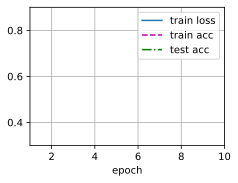

In [142]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

简洁实现

In [144]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 256), nn.ReLU(),
                    nn.Dropout(dropout1), nn.Linear(256,256), nn.ReLU(),
                    nn.Dropout(dropout2), nn.Linear(256,10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std = 0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

AssertionError: 0.09955

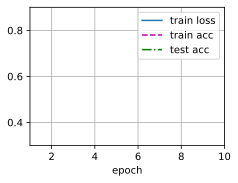

In [148]:
trainer = torch.optim.SGD(net.parameters(), lr = lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 4.5数值稳定性和模型初始化
梯度消失

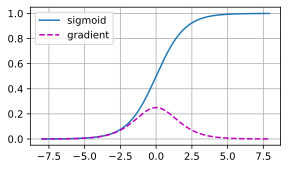

In [149]:
x = torch.arange(-8,8,0.1, requires_grad = True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

梯度爆炸

In [150]:
M = torch.normal(0, 1, size=(4, 4))
print('一个矩阵 \n', M)
for i in range(100):
    M = torch.mm(M, torch.normal(0, 1, size=(4, 4)))

print('乘以100个矩阵后\n', M)

一个矩阵 
 tensor([[-0.3674, -0.4375, -0.1477, -0.3397],
        [ 1.2798, -1.3135, -1.1510, -0.0537],
        [ 1.5280, -0.4269,  1.0276, -1.2053],
        [-0.0029, -0.0794,  0.5893, -0.0846]])
乘以100个矩阵后
 tensor([[3.6255e+20, 1.8740e+20, 3.3608e+19, 3.1515e+20],
        [1.6100e+21, 8.3225e+20, 1.4925e+20, 1.3995e+21],
        [5.3829e+21, 2.7825e+21, 4.9900e+20, 4.6791e+21],
        [3.7573e+20, 1.9422e+20, 3.4831e+19, 3.2661e+20]])
